## Exercise 11.2

**Lane Ellisor**

*Updated Mar 1, 2021*

In [1]:
# Importing Modules
from scipy import cluster
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd
import scipy.special as special
from sympy.interactive import printing
from scipy import integrate as int
printing.init_printing(use_latex=True)
from sympy import symbols
from sympy.plotting import plot
from sympy import *
import sympy as sp
# This makes the plots appear inside the notebook
%matplotlib inline

Consider a string with fixed ends and length $L = 1$, which has constant tension $T = 1$, but whose density is defined as $\rho (x) = 1 + x^2$. The modes of vibration have basic profile shapes of $v(x)$ who satisfy 

$$ -v''(x) = \lambda_n(1+x^2)v(x) $$ 

With the conditions 

$$ 0<x<1$$  $$v(0) = v(1) = 1$$

a) Compute the average tension $T_0$ and average density $\rho_0$ of the string. Then letting $c=\sqrt{\frac{T_0}{\rho_0}}$, form an intial approximation of $f^{(0)}_1 = \frac{c}{2L}$ of the strings freqency $f_1$. 

In [2]:
# Defining Variables 
def T(x):
    return 1
L = 1
def r_x(x):
    return 1 + x**2

# Defining the average of both T and \rho
T_0 = int.quad(T, 0, L)
r_0 = int.quad(r_x, 0, L)

print('The Average Tension is', T_0[0], 'with an error of', T_0[1])
print('The Average Density is', r_0[0], 'with an error of', r_0[1])

c = np.sqrt(T_0[0]/r_0[0])
f_01 = c/(2*L)

print('The value of c is', c)
print('The intial approximation of the strings first frequency is', f_01)

The Average Tension is 1.0 with an error of 1.1102230246251565e-14
The Average Density is 1.3333333333333333 with an error of 1.4802973661668752e-14
The value of c is 0.8660254037844386
The intial approximation of the strings first frequency is 0.4330127018922193


Handworked calcuations for $T_0$ and $\rho_0$ show that 

$T_0 = 1$

$\rho_0 = \frac{4}{3}$

Further calculations of $c$ and $f^{0}_1$ show that 

$c = \frac{ \sqrt{3}}{2}$

$f^{0}_1 = \frac{ \sqrt{3}}{4} $

b) Compute $\lambda^{(0)}_1 = (2\pi f^{(0)}_1)^2$. Then numerically solve 

$$ -v''(x) = \lambda_n (1+x^2)v(x) $$

In [3]:
#Computing l_1^0
l_01 = (2*np.pi *f_01)**2
print('l_n is', l_01)

l_n is 7.402203300817018


A calculation for $\lambda^{(0)}_1$ shows 

$\lambda^{(0)}_1 = \frac{3\pi^2}{4}$

Now we have the ODE 

$ -v''(x) = \lambda_n (1+x^2)v(x) $

So using the transform $z = v'(x)$

$ -z'(x) = \lambda_n (1+x^2) v(x)$ 

$ z'(x) = -l_n (1+x^2) v(x)$ 


v = zx[0] and z = zx[1]

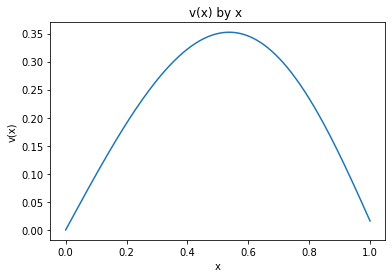

In [8]:
def dU_dx(U,x):
    # here U is a vector s.t. v=U[0] and z = U[1]. Should return [v',z']
    return [U[1], -l_01*(1+x**2)*U[0]]
zx0 = [0,1]
xs = np.linspace(0,1, 1000)
Us = odeint(dU_dx,zx0, xs)

ys = Us[:,0]


plt.xlabel("x")
plt.ylabel("v(x)")
plt.title("v(x) by x ")
plt.plot(xs, ys)

c) Approximating $\lambda^{(0)}_1$ to get $v(1)=1$
Our $\lambda^{(0)}_1$ is too big

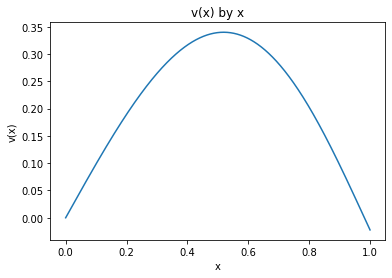

In [16]:
l = 8
def dU_dx(U,x):
    # here U is a vector s.t. v=U[0] and z = U[1]. Should return [v',z']
    return [U[1], -l*(1+x**2)*U[0]]
zx0 = [0,1]
xs = np.linspace(0,1, 1000)
Us = odeint(dU_dx,zx0, xs)

ys = Us[:,0]


plt.xlabel("x")
plt.ylabel("v(x)")
plt.title("v(x) by x")
plt.plot(xs, ys)

d) Estimate $f_1 \approx \frac{\sqrt{\lambda^{(1)}_1}}{2\pi}$

In [6]:
f_1 = np.sqrt(l)/ (2 *np.pi)
display(f_1)

e) This shows that the profile shape is more biased towards to heavier end of the string